In [4]:
#Trevor Taylor

import numpy as np
import matplotlib.pyplot as plt
from numba import jit

@jit
def LJ(r):
    r6 = r ** 6
    r12 = r ** 12
    return 4*(1/r12 - 1/r6)

@jit
def dis(x1,x2,y1,y2):
    return np.sqrt((x1-x2)**2 + ((y1-y2)**2))

values = []

@jit
def minimize(N):
    for i in range(N):
        x1 = 3 * np.random.random()
        x2 = 3 * np.random.random()
        x3 = 3 * np.random.random()
        y1 = 3 * np.random.random()
        y2 = 3 * np.random.random()
        y3 = 3 * np.random.random()
        
        r1 = dis(x1,x2,y1,y2)
        r2 = dis(x1,x3,y1,y3)
        r3 = dis(x2,x3,y2,y3)
        
        E1 = LJ(r1)
        E2 = LJ(r2)
        E3 = LJ(r3)
        
        Et = E1 + E2 + E3
        
        values.append(Et)
    return values

In [5]:
min(minimize(100000))

-2.9904484876385364

In [3]:
from scipy.optimize import minimize
import numpy as np
from numba import jit
import time

time1 = time.time()

@jit
def init_pos(N, L=3):
    return L*np.random.random_sample((N*3,))

@jit
def total_energy(positions):
   
    E = 0
    N_atom = int(len(positions)/3)

    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            
            dist = np.linalg.norm(pos1-pos2)

            E += LJ(dist)
    return E

x = []
f = []
N = 20
N_atoms = 15

for i in range(N):
    pos = init_pos(N_atoms)
    res = minimize(total_energy, pos, method='CG', tol=1e-4)
    f.append(res.fun)
    x.append(res.x)
    
time2 = time.time()
t = time2 - time1

In [4]:
min(f)

-52.32262726175552

In [5]:
print(t)

38.32828736305237


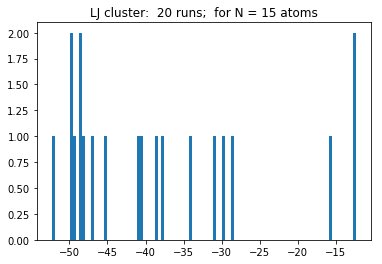

In [6]:
import matplotlib.pyplot as plt
plt.title('LJ cluster:  '+ str(N)+ ' runs;  for N = ' + str(N_atoms)+' atoms')
plt.hist(f,100)
plt.show()

In [39]:
from scipy.optimize import minimize
import numpy as np
from numba import jit
import time

@jit
def init_pos(N, L=3):
    return L*np.random.random_sample((N*3,))

@jit
def total_energy(positions):
   
    E = 0
    N_atom = int(len(positions)/3)

    for i in range(N_atom-1):
        for j in range(i+1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            
            dist = np.linalg.norm(pos1-pos2)

            E += LJ(dist)
    return E

x = []
f = []
times = []
N = 20
N_atoms = 15

for i in range(N):
    t1 = time.time()
    pos = init_pos(N_atoms)
    res = minimize(total_energy, pos, method='CG', tol=1e-4)
    f.append(res.fun)
    x.append(res.x)
    t2 = time.time()
    times.append(t2-t1)

In [40]:
print(times)

[1.1200227737426758, 3.593458652496338, 1.2989401817321777, 2.473268508911133, 0.48267459869384766, 3.5190532207489014, 0.676889181137085, 0.4925518035888672, 0.9655730724334717, 1.151674509048462, 0.8337275981903076, 0.7370719909667969, 1.5085484981536865, 0.6803827285766602, 1.2033205032348633, 4.507518529891968, 1.159369707107544, 2.2567317485809326, 0.8690097332000732, 1.0780861377716064]
